In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings; warnings.simplefilter('ignore')
import math
from matplotlib.patches import Circle
import itertools
import numpy.linalg
from IPython.display import clear_output, display
from matplotlib import colors
matplotlib.rc('font',family='Arial')
from matplotlib.lines import Line2D
import os
ppmm = 2.75 
track_directory = "/Users/mrat0010/Documents/GitHub/Polytrack_WIP/data/output/Ratnayake2023_processed_CV4A/Polytrack/cam_2_S_video_20210308_112402.h264"
# track_directory = "/Users/mrat0010/Documents/GitHub/Polytrack_WIP/data/output/Ratnayake2023_processed_CV4A/Polytrack_filtered"/

In [75]:

# Initialize an empty DataFrame
insect_tracks = pd.DataFrame()
insect_info = []


# Walk through all subdirectories in the track_directory
for root, dirs, files in os.walk(track_directory):
    for file in files:
        # Check if the file is a CSV and contains one of the target names
        if file.endswith('.csv') and ('honeybee' in file or 'hoverfly' in file or 'moth' in file or 'wasp' in file):
            # Construct the full filepath
            filepath = os.path.join(root, file)
            # Load the CSV file into a DataFrame
            df = pd.read_csv(filepath)
            

            # Extract the insect name from the filename
            filename = os.path.basename(filepath)
            insect_name = filename.split('_')[6].split('.')[0]
            camera_direction = filename.split('_')[2].split('.')[0]
            insect_number = filename.split('_')[7].split('.')[0]
            insect_info.append((f'{insect_name}_{insect_number}'))

            # Remove blank spaces in the column names
            df.columns = df.columns.str.strip()


            # If camera_direction is "S", y_adj = 1080 - y, else y_adj=y
            if camera_direction == 'N':
                df['y'] = 1080 - df['y']

            # Convert the x and y columns to mm by dividing by the pixels per mm
            df['x'] = df['x'] / ppmm
            df['y'] = df['y'] / ppmm

            # Smooth out the data in x and y columns using a rolling average
            df['x'] = df['x'].rolling(10, min_periods=1).mean()
            df['y'] = df['y'].rolling(10, min_periods=1).mean()

            # Rename the columns to include the insect number and insect name
            df.columns = [f'{insect_name}_{insect_number}_{col}' for col in df.columns]

            # add the dataframe to the insect_tracks dataframe
            insect_tracks = pd.concat([insect_tracks, df], axis=1)


insect_tracks

,wasp_1002000000_nframe,wasp_1002000000_x,wasp_1002000000_y,wasp_1002000000_flower,wasp_1004000006_nframe,wasp_1004000006_x,wasp_1004000006_y,wasp_1004000006_flower,wasp_1005000013_nframe,wasp_1005000013_x,...,hoverfly_1001000018_y,hoverfly_1001000018_flower,honeybee_1005000012_nframe,honeybee_1005000012_x,honeybee_1005000012_y,honeybee_1005000012_flower,honeybee_1002000000_nframe,honeybee_1002000000_x,honeybee_1002000000_y,honeybee_1002000000_flower
0,5297.0,654.181818,322.181818,NaN,5687.0,690.181818,220.727273,NaN,6472.0,321.818182,...,125.818182,NaN,17410.0,580.000000,360.000000,NaN,927.0,572.727273,381.454545,NaN
1,5298.0,654.909091,322.181818,NaN,5688.0,690.909091,227.090909,NaN,6473.0,319.818182,...,126.545455,NaN,17411.0,579.454545,360.181818,NaN,928.0,572.545455,380.363636,NaN
2,5299.0,660.484848,306.303030,NaN,5689.0,691.030303,232.969697,NaN,6474.0,316.969697,...,127.393939,NaN,17412.0,578.424242,360.000000,NaN,929.0,571.757576,378.060606,NaN
3,5300.0,662.818182,296.090909,NaN,5690.0,690.545455,238.727273,NaN,6475.0,314.090909,...,128.000000,NaN,17413.0,578.000000,359.545455,NaN,930.0,571.181818,374.909091,NaN
4,5301.0,663.490909,288.654545,NaN,5691.0,688.654545,243.345455,NaN,6476.0,310.981818,...,128.945455,NaN,17414.0,581.090909,357.381818,NaN,931.0,571.272727,372.363636,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Honeybee Tracks: ['honeybee_1001000000', 'honeybee_1008000024', 'honeybee_1003000008', 'honeybee_1005000015', 'honeybee_1002000004', 'honeybee_1001000009', 'honeybee_1004000014', 'honeybee_1002000012', 'honeybee_1005000016', 'honeybee_1011000022', 'honeybee_1017000031', 'honeybee_1008000008', 'honeybee_1016000030', 'honeybee_1009000016', 'honeybee_1012000026', 'honeybee_1003000028', 'honeybee_1004000049', 'honeybee_1001000017', 'honeybee_1005000057', 'honeybee_1002000212', 'honeybee_1001000205', 'honeybee_1013000032', 'honeybee_1001000009', 'honeybee_1015000032', 'honeybee_1004000017', 'honeybee_1007000023', 'honeybee_1002000010', 'honeybee_1012000030', 'honeybee_1014000032', 'honeybee_1003000012', 'honeybee_1006000022', 'honeybee_1016000043', 'honeybee_1011000030', 'honeybee_1009000026', 'honeybee_1005000012', 'honeybee_1002000000']
Hoverfly Tracks: ['hoverfly_1005000025', 'hoverfly_1004000023', 'hoverfly_1001000007', 'hoverfly_1002000015', 'hoverfly_1003000016', 'hoverfly_1001000018'

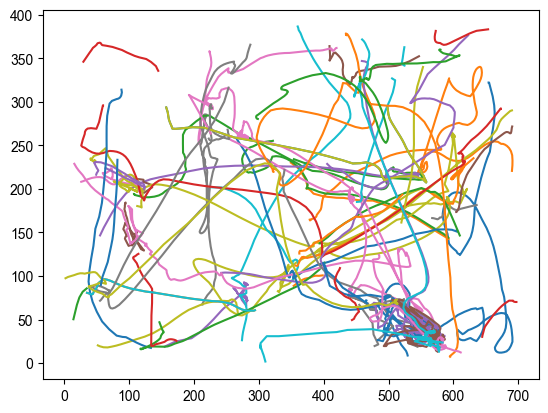

In [76]:
# For all the values in the insect_info list, Plot the x and y values
for insect in insect_info:
    x = insect_tracks[f'{insect}_x']
    y = insect_tracks[f'{insect}_y']
    plt.plot(x, y, label=insect)

# plt.legend()


def getPlotColor(_insect):
    _insect_type = _insect.split('_')[0]
    # print(_insect_type)
    
    if _insect_type == 'honeybee': _color = '#1f77b4' #blue - honeybee
    elif _insect_type =='hoverfly':_color = '#ff7f0e' #orage - hoverfly
    elif _insect_type == 'moth':_color = '#2ca02c' #green - moth
    elif _insect_type == 'wasp':_color = '#d62728' # red- wasp
    else: _color = '#7f7f7f'
    
    return _color

honeybee_tracks = []
hoverfly_tracks = []
moth_tracks = []
wasp_tracks = []


for insect in insect_info:
    insect_type = insect.split('_')[0]
    if insect_type == 'honeybee':
        honeybee_tracks.append(insect)
    elif insect_type == 'hoverfly':
        hoverfly_tracks.append(insect)
    elif insect_type == 'moth':
        moth_tracks.append(insect)
    elif insect_type == 'wasp':
        wasp_tracks.append(insect)

print("Honeybee Tracks:", honeybee_tracks)
print("Hoverfly Tracks:", hoverfly_tracks)
print("Moth Tracks:", moth_tracks)
print("Wasp Tracks:", wasp_tracks)



In [77]:
# Browse through all subdirectories in the track_directory and add csv files containing names flower_positions to a dataframe called flower_positions
position_number_list = []

flower_positions = pd.DataFrame()
for root, dirs, files in os.walk(track_directory):
    for file in files:
        if file.endswith('.csv') and 'flower_positions' in file:
            filepath = os.path.join(root, file)
            filename = os.path.basename(filepath)
            position_number = filename.split('_')[5].split('.')[0]
            position_number_list.append(position_number)

            camera_direction = filename.split('_')[2].split('.')[0]

            df = pd.read_csv(filepath)
            
            # Remove blank spaces in the column names
            df.columns = df.columns.str.strip()

            if camera_direction == 'N':
                df['cy'] = 1080 - df['cy']

            df['cx'] = df['cx'] / ppmm
            df['cy'] = df['cy'] / ppmm
            df['radius'] = df['radius'] / ppmm

            # Rename the columns to include the position number
            df.columns = [f'{position_number}_{col}' for col in df.columns]

            flower_positions = pd.concat([flower_positions, df], axis=1)


flower_positions

,112402_flower_num,112402_species,112402_cx,112402_cy,112402_radius,132804_flower_num,132804_species,132804_cx,132804_cy,132804_radius,...,114802_flower_num,114802_species,114802_cx,114802_cy,114802_radius,123004_flower_num,123004_species,123004_cx,123004_cy,123004_radius
0,0.0,0.0,213.818182,302.545455,10.909091,0.0,0.0,410.545455,347.636364,7.272727,...,0.0,0.0,144.727273,47.636364,9.454545,0.0,0.0,430.181818,292.000000,8.727273
1,1.0,0.0,324.363636,211.636364,8.727273,1.0,0.0,437.818182,319.272727,8.363636,...,1.0,0.0,379.636364,116.727273,8.000000,1.0,0.0,510.909091,241.090909,8.000000
2,2.0,0.0,285.090909,282.181818,6.545455,2.0,0.0,270.545455,76.000000,9.818182,...,2.0,0.0,222.181818,166.181818,7.636364,2.0,0.0,309.454545,277.454545,6.545455
3,3.0,0.0,376.727273,174.545455,8.363636,3.0,0.0,259.272727,97.818182,9.090909,...,3.0,0.0,97.454545,169.454545,7.636364,3.0,0.0,457.818182,323.636364,8.000000
4,4.0,0.0,440.363636,115.272727,7.272727,4.0,0.0,208.000000,244.727273,10.181818,...,4.0,0.0,152.363636,158.909091,8.000000,4.0,0.0,55.272727,81.818182,5.818182
5,NaN,NaN,NaN,NaN,NaN,5.0,0.0,221.454545,139.636364,4.727273,...,5.0,0.0,418.181818,129.090909,8.363636,5.0,0.0,581.454545,335.636364,6.909091
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,409.818182,148.000000,7.636364,6.0,0.0,349.818182,297.818182,5.454545
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,0.0,122.181818,34.181818,6.909091,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,0.0,523.636364,293.454545,4.727273,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


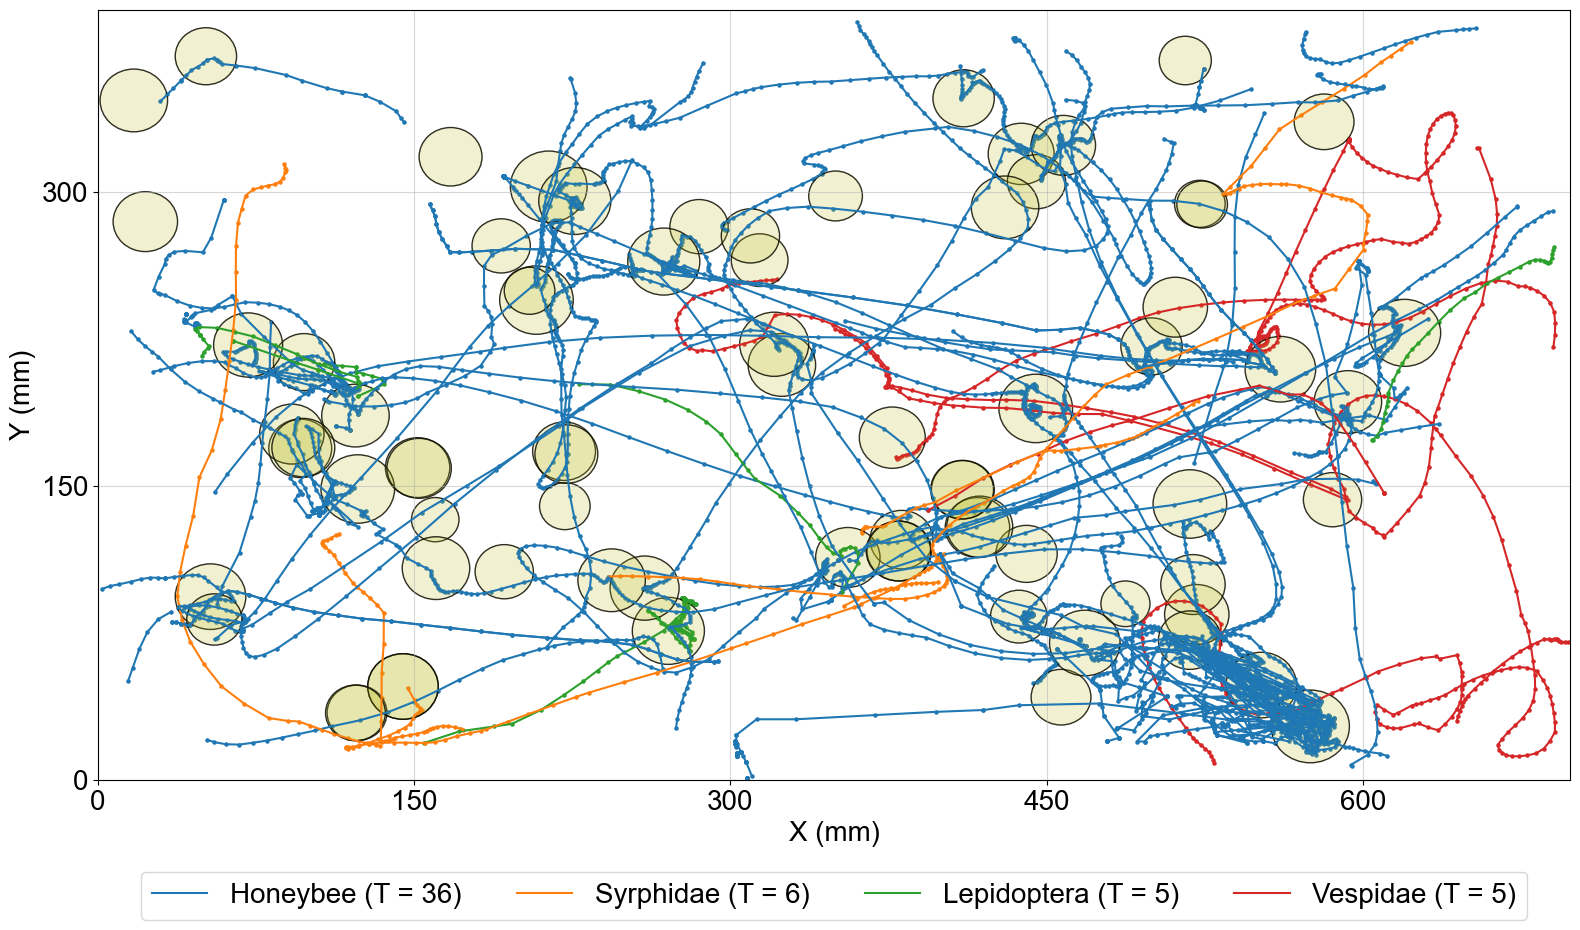

In [78]:
flw_thres = 20/ppmm

plt.figure(figsize=(19,10))

for insect in insect_info:
    x = insect_tracks[f'{insect}_x']
    y = insect_tracks[f'{insect}_y']
    colour = getPlotColor(insect)
    plt.plot(x, y, label=insect, color = colour)
    plt.scatter(x, y, color = colour, s=5)

ax = plt.gca()
for position in position_number_list:
    for row in flower_positions[f'{position}_cx'].dropna().index.tolist():
        ax.add_patch(Circle((flower_positions[f'{position}_cx'][row], flower_positions[f'{position}_cy'][row]), radius = (flower_positions[f'{position}_radius'][row]+flw_thres), color = 'tab:olive', fill=True, alpha = 0.2))
        ax.add_patch(Circle((flower_positions[f'{position}_cx'][row], flower_positions[f'{position}_cy'][row]), radius = (flower_positions[f'{position}_radius'][row]+flw_thres), color = 'k', fill=False, alpha = 0.8))

legend_elements = [Line2D([0], [0], linestyle='-', color=getPlotColor('honeybee_'), label='Honeybee (T = '+str(len(honeybee_tracks))+")", markerfacecolor='k', markersize=10),
                   Line2D([0], [0], linestyle='-', color=getPlotColor('hoverfly_'), label='Syrphidae (T = '+str(len(hoverfly_tracks))+")",markerfacecolor='k', markersize=10),
                   Line2D([0], [0], linestyle='-', color=getPlotColor('moth_'), label='Lepidoptera (T = '+str(len(moth_tracks))+")",markerfacecolor='k', markersize=10),
                   Line2D([0], [0], linestyle='-', color=getPlotColor('wasp_'), label='Vespidae (T = '+str(len(wasp_tracks))+")",markerfacecolor='k', markersize=10)]
                #    Line2D([0], [0], marker="o", color=getPlotColor(11513300101), label='Flowers (T = '+str(flower_count)+")",markerfacecolor='olive', markersize=10, alpha = 0.2)]

# Create the figure
plt.legend(handles=legend_elements, loc=8, ncol=5, frameon=True, fontsize=20, bbox_to_anchor=(0.5, -0.2))

plt.xlabel('X (mm)', fontsize=20)
plt.ylabel('Y (mm)', fontsize=20)
plt.xticks([0, 150, 300, 450, 600],fontsize=20)
plt.yticks([0, 150, 300], fontsize=20)
plt.xlim(0, 1920/ppmm)
plt.ylim(0, 1080/ppmm)
plt.grid(True, alpha = 0.5)


In [73]:

print(len(insect_info))

53


In [ ]:
insect_types = []

for insect in insect_info:
    insect_types.append(insect.split('_')[0])
# print(insect_types)

['wasp', 'wasp', 'wasp', 'wasp', 'honeybee', 'moth', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'moth', 'honeybee', 'honeybee', 'honeybee', 'moth', 'honeybee', 'honeybee', 'wasp', 'honeybee', 'moth', 'moth', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'hoverfly', 'hoverfly', 'hoverfly', 'hoverfly', 'hoverfly', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'honeybee', 'hoverfly', 'honeybee', 'honeybee']


In [100]:
#train-3 small-unbalanced

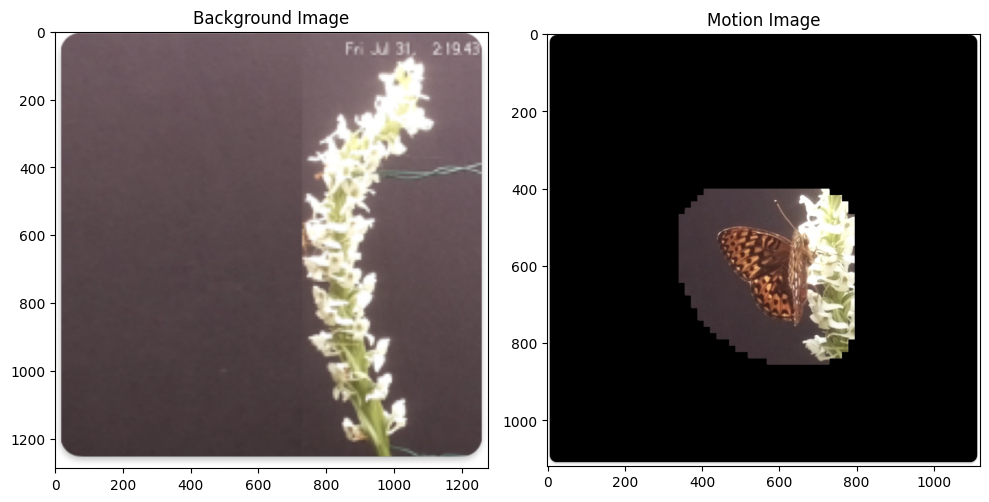

In [5]:
background = '/Users/mrat0010/Library/CloudStorage/GoogleDrive-malika.ratnayake@monash.edu/My Drive/Conferences/CV4Animals-2024/figures/background.png'
motion = '/Users/mrat0010/Library/CloudStorage/GoogleDrive-malika.ratnayake@monash.edu/My Drive/Conferences/CV4Animals-2024/figures/motion.png'


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the filepaths for the background and motion images
background = '/Users/mrat0010/Library/CloudStorage/GoogleDrive-malika.ratnayake@monash.edu/My Drive/Conferences/CV4Animals-2024/figures/background.png'
motion = '/Users/mrat0010/Library/CloudStorage/GoogleDrive-malika.ratnayake@monash.edu/My Drive/Conferences/CV4Animals-2024/figures/motion.png'

# Load the images
background_img = mpimg.imread(background)
motion_img = mpimg.imread(motion)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(background_img)
plt.title('Background Image')

plt.subplot(1, 2, 2)
plt.imshow(motion_img)
plt.title('Motion Image')

plt.tight_layout()
plt.show()

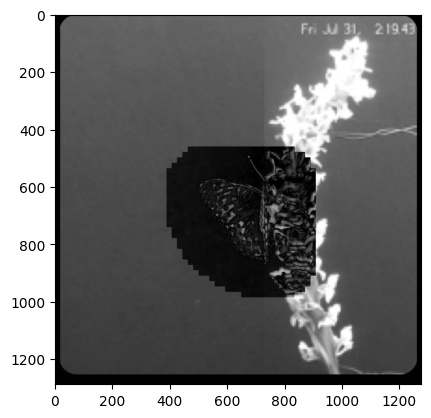

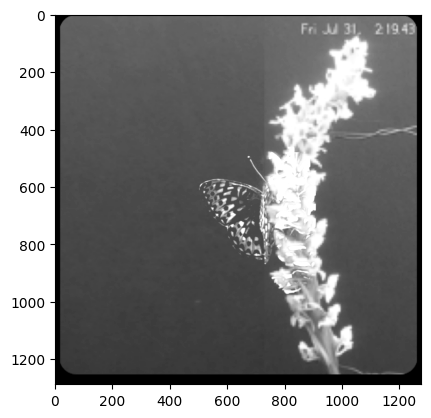

In [35]:
import cv2

background = '/Users/mrat0010/Library/CloudStorage/GoogleDrive-malika.ratnayake@monash.edu/My Drive/Conferences/CV4Animals-2024/figures/background.png'
motion = '/Users/mrat0010/Library/CloudStorage/GoogleDrive-malika.ratnayake@monash.edu/My Drive/Conferences/CV4Animals-2024/figures/motion.png'

# Example code using OpenCV
background = cv2.imread(background)
background_g = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

motion = cv2.imread(motion)
motion_g = cv2.cvtColor(motion, cv2.COLOR_BGR2GRAY)

# Resize the motion image to match the background image
resized_motion_image = cv2.resize(motion_g, (background.shape[1], background.shape[0]))



diff_frame = cv2.absdiff(background_g, resized_motion_image )
preprocessed_frame = cv2.add(resized_motion_image, diff_frame)

# Save diff_frame as an image
cv2.imwrite('diff_frame.png', diff_frame)

# Save preprocessed_frame as an image
cv2.imwrite('preprocessed_frame.png', preprocessed_frame)

# # Set the threshold value
# threshold_value = 1

# # Apply the threshold filter to motion_g
# _, motion_g_thresholded = cv2.threshold(motion_g, threshold_value, 255, cv2.THRESH_BINARY)

# Show the resulting thresholded image
plt.imshow(diff_frame, cmap='gray')

plt.show()
#save the image
# plt.savefig('diff_frame.png')

# Show the resulting thresholded image
plt.imshow(preprocessed_frame, cmap='gray')

plt.show()
#save the image
# plt.savefig('preprocessed_frame.png')




# Now both background_g and motion_g_resized have the same size

# # Convert background image to grayscale
# background_image_gray = background_image.convert('L')


# import numpy as np

# # Assuming you have two grayscale images: image1 and image2

# # Convert the images to numpy arrays
# image1_array = np.array(resized_motion_image_gray)
# image2_array = np.array(background_image_gray)

# # Calculate the absolute difference between the two images
# diff = np.abs(image1_array - image2_array)

# # Show the resulting difference image
# plt.imshow(diff, cmap='gray')
# plt.show()